In [45]:
%matplotlib inline
import numpy as np
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt

In [15]:
# 500 max word length, LSTM only architecture, 20 of the top level classes, 100 epochs
predictionPath = 'results/epochPreds_500ML_LSTM_20Class.npy'
avgLossPath = 'results/epochAvgLoss_500ML_LSTM_20Class.npy'
lossSavepath = 'src/plotting/resultPlotting/trainingLoss_500ML_LSTM_20Class.png'

truePath = 'results/yDev.npy'

In [16]:
preds = np.load(predictionPath)
avgLoss = np.load(avgLossPath)
yTruth = np.load(truePath)

In [17]:
print(preds.shape)
print(avgLoss.shape)
print(yTruth.shape)

(100, 13182, 20)
(100,)
(13182, 20)


In [19]:
preds = scipy.special.expit(preds)# this is sigmoid function applied element wise
preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0

In [38]:
prec = metrics.precision_score(y_pred = preds[99,:,:], y_true= yTruth, average = 'samples')
rec = metrics.recall_score(y_pred = preds[99,:,:], y_true= yTruth, average = 'samples')
f1 = metrics.f1_score(y_pred = preds[99,:,:], y_true= yTruth, average = 'samples')
print('Precsion score averaged over samples %3f'%(prec))
print('Recall score averaged over samples %3f'%(rec))
print('F1 score averaged over samples %3f'%(f1))

Precsion score averaged over samples 0.374561
Recall score averaged over samples 0.338242
F1 score averaged over samples 0.335792


/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [72]:
precOverEpoch = np.zeros(preds.shape[0])
recOverEpoch = np.zeros(preds.shape[0])
f1OverEpoch = np.zeros(preds.shape[0])
for epoch in range(preds.shape[0]):
    prec = metrics.precision_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    rec = metrics.recall_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    f1 = metrics.f1_score(y_pred = preds[epoch,:,:], y_true= yTruth, average = 'samples')
    precOverEpoch[epoch] = prec
    recOverEpoch[epoch] = rec
    f1OverEpoch[epoch] = f1
#     print(f1)

/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/envs/clinicalNoteTagger/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


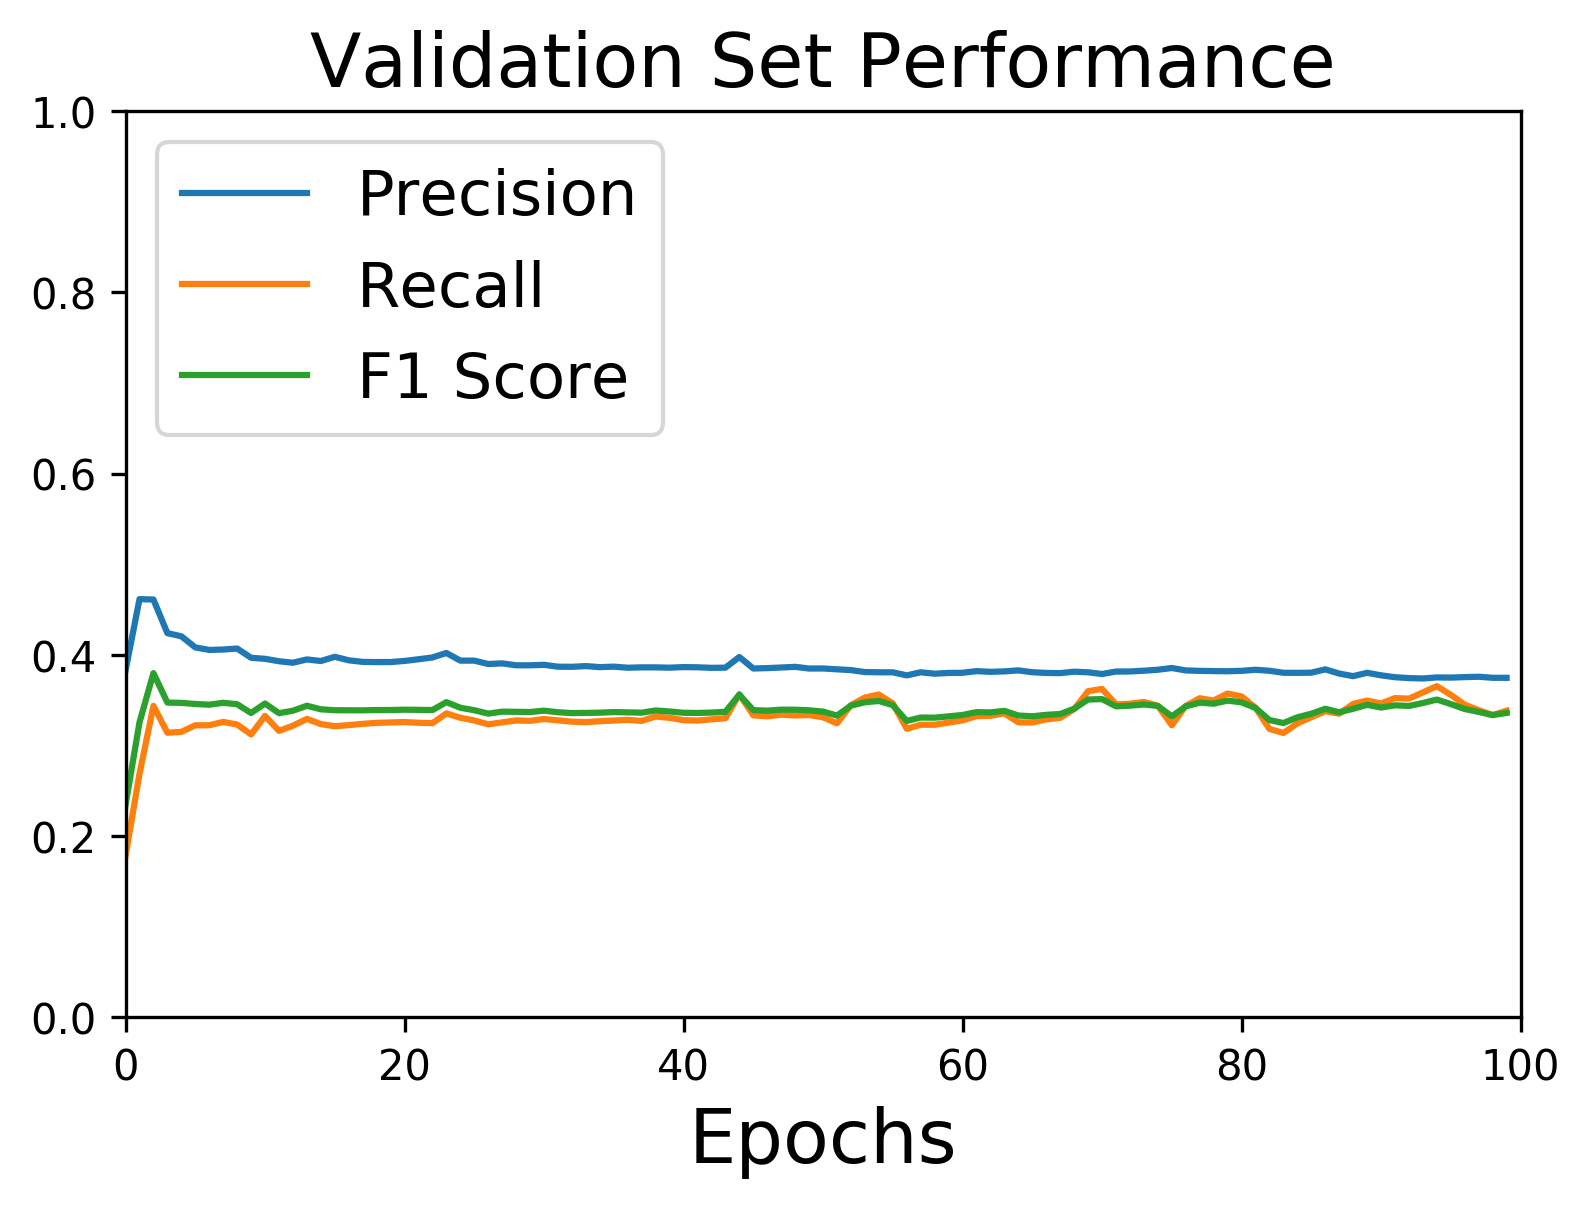

In [71]:
# x = np.arange(10)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, precOverEpoch)
plt.plot(x, recOverEpoch)
plt.plot(x, f1OverEpoch)
plt.axis([0, 100, 0, 1.0])

plt.legend(['Precision', 'Recall', 'F1 Score'], loc='upper left', fontsize = 15)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/performance.png')
# plt.show()

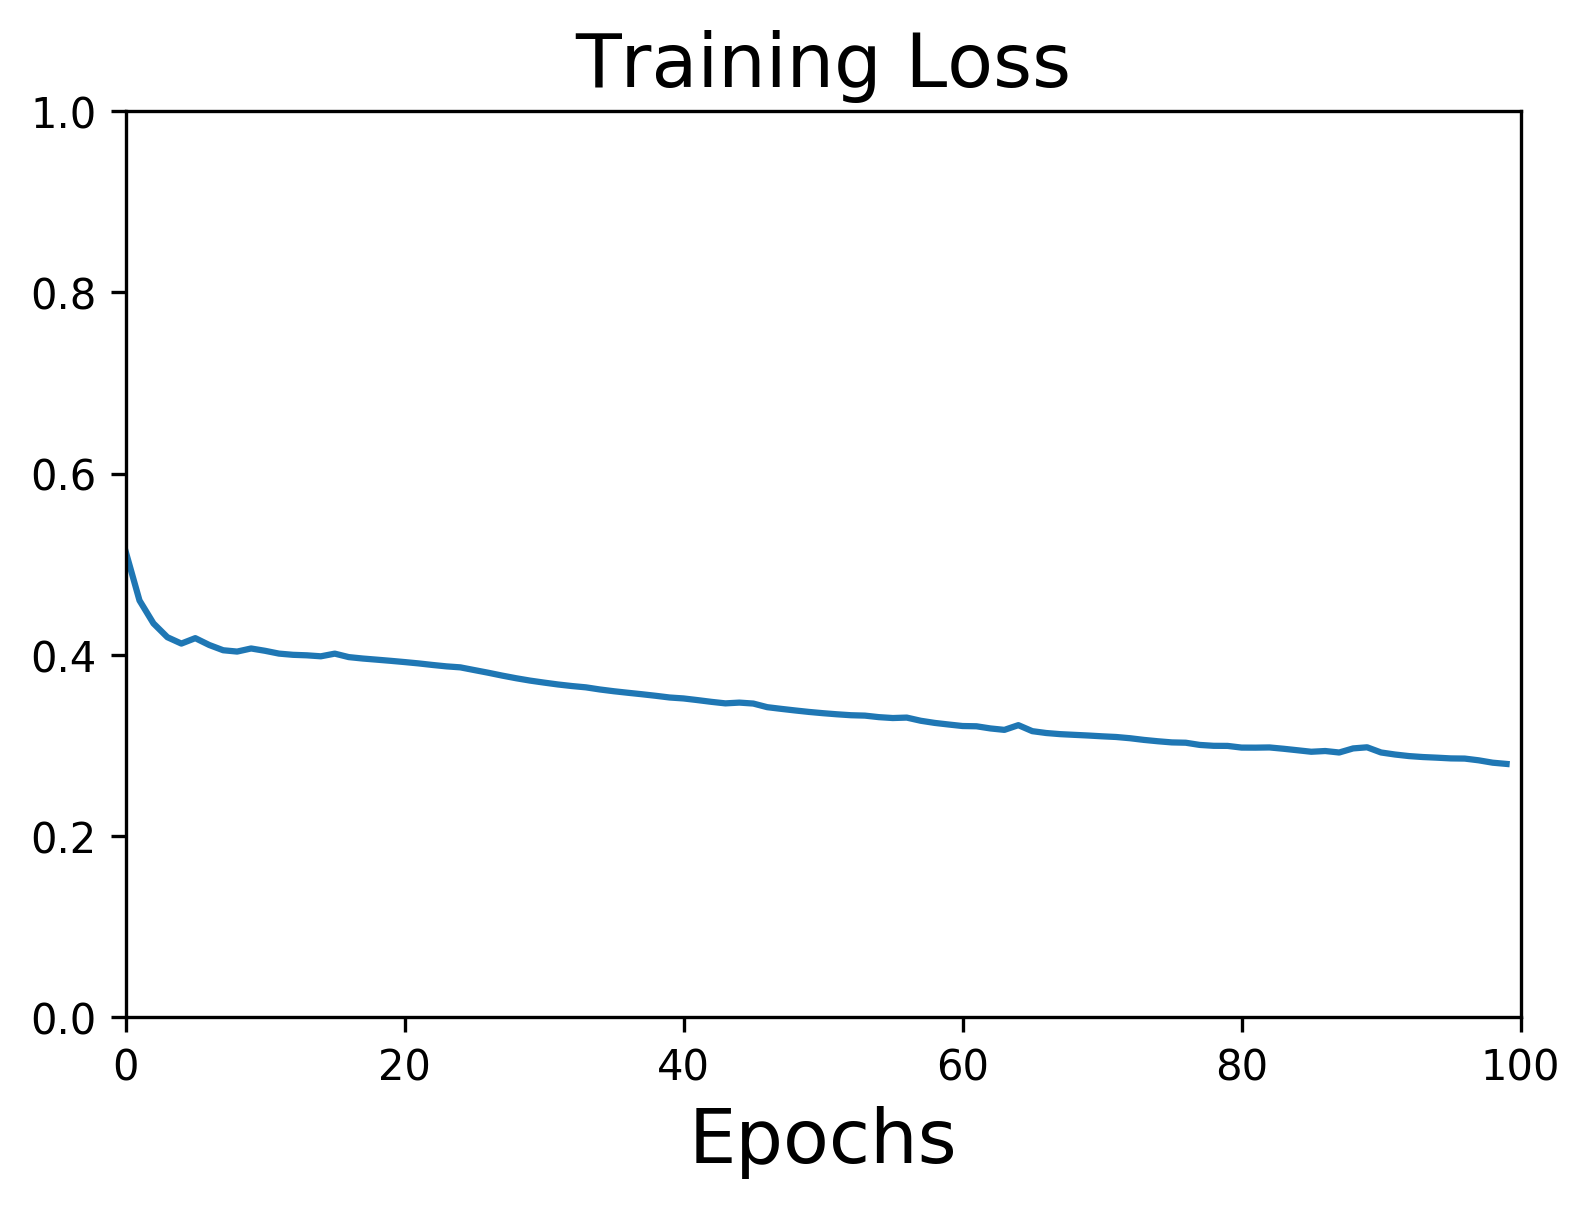

In [70]:
avgLoss
# x = np.arange(10)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, avgLoss)
plt.axis([0, 100, 0, 1.0])

# plt.legend(['Precision', 'Recall', 'F1 Score'], loc='upper left', fontsize = 15)
plt.title('Training Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig('src/plotting/resultPlotting/trainingLoss.png')
# plt.show()